# ASHITA K
# BEGINNER LEVEL TASK 1:
# PREDICTION USING SUPERVISED ML

# Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Loading the dataset

In [14]:
student = pd.read_csv("student_scores.csv")
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [16]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
student.shape

(25, 2)

In [25]:
student.columns

Index(['Hours', 'Scores'], dtype='object')

# Preprocessing the dataset

In [19]:
student.isna().any()

Hours     False
Scores    False
dtype: bool

In [80]:
student.isna().sum()

Hours     0
Scores    0
dtype: int64

# Correlation Matrix

In [20]:
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

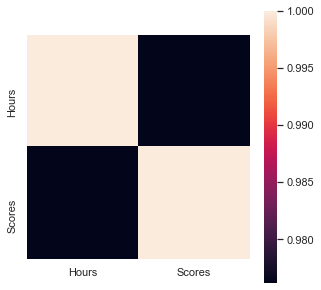

In [47]:
corr = student.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, square=True)

# Exploratory data analysis

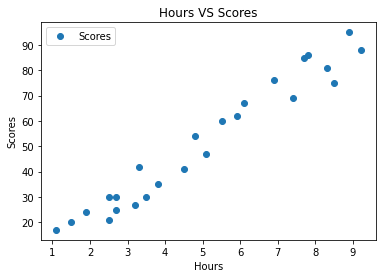

In [24]:
student.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours VS Scores")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

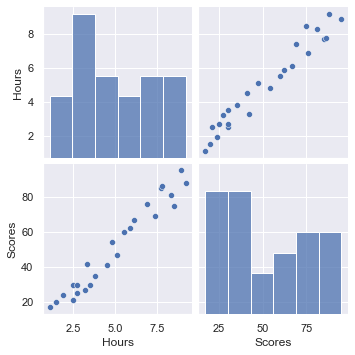

In [27]:
sns.pairplot(student)

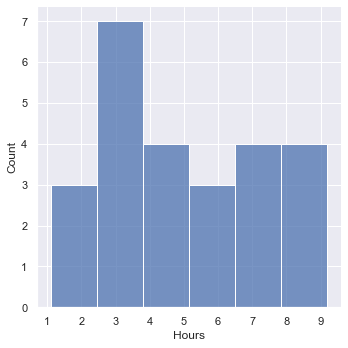

In [44]:
sns.displot(student['Hours'])

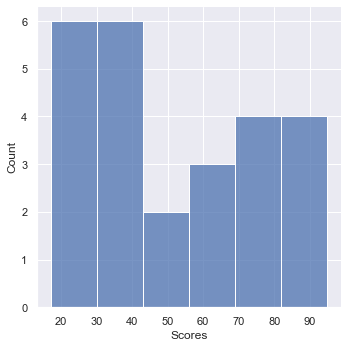

In [43]:
sns.displot(student['Scores'])

<AxesSubplot:xlabel='Hours'>

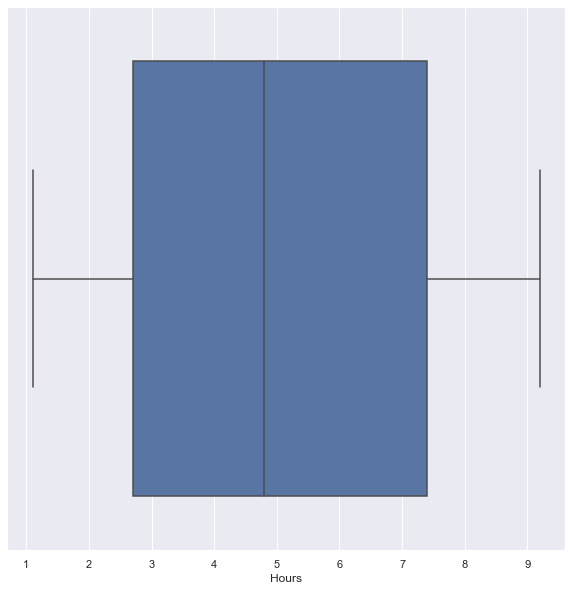

In [34]:
sns.boxplot(x='Hours', data=student)

<AxesSubplot:xlabel='Scores'>

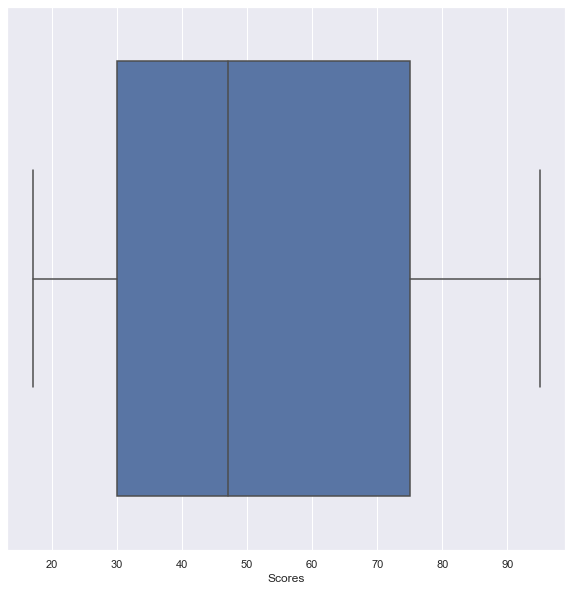

In [35]:
sns.boxplot(x='Scores', data=student)

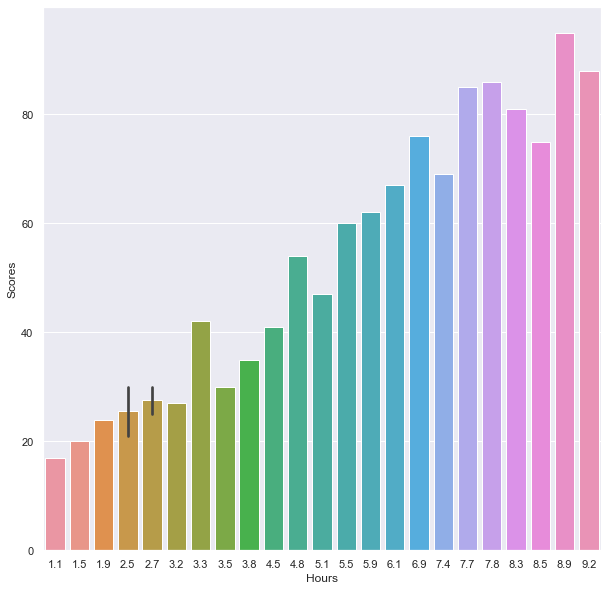

In [26]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x="Hours", y="Scores", data=student)
plt.show()

<AxesSubplot:>

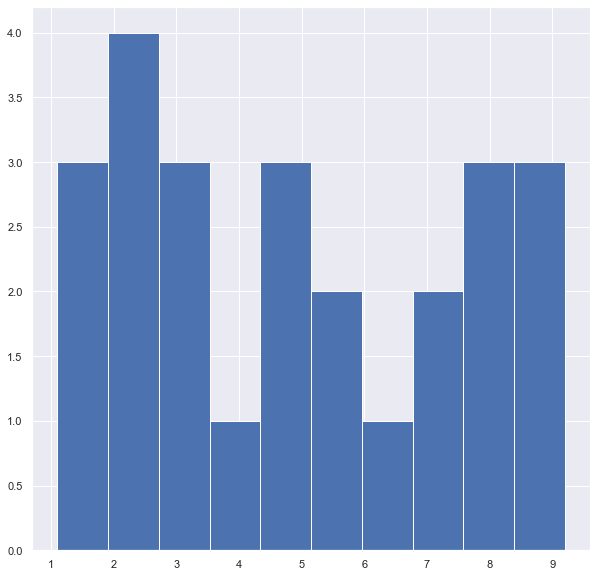

In [58]:
student['Hours'].hist()

<AxesSubplot:>

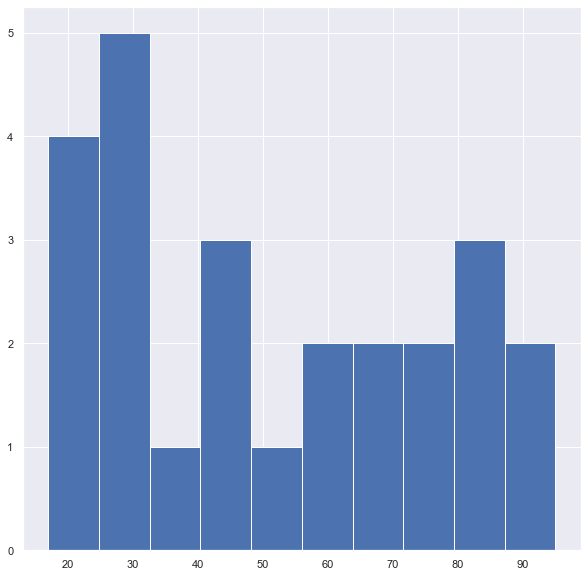

In [59]:
student['Scores'].hist()

# Preparing the data

In [36]:
x = student.iloc[:, :-1].values
y = student.iloc[:, 1].values

# Training the algorithm

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(x_train, y_train)

LinearRegression()

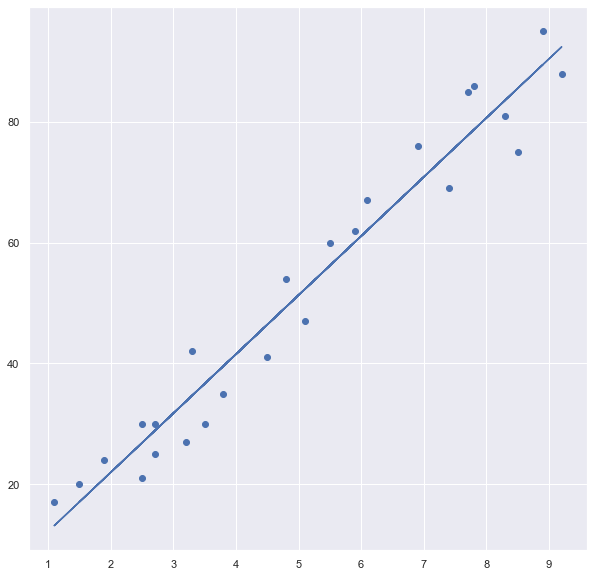

In [53]:
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Making Predictions

In [55]:
y_pred = lr.predict(x_test)
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [77]:
compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
compare

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


<AxesSubplot:>

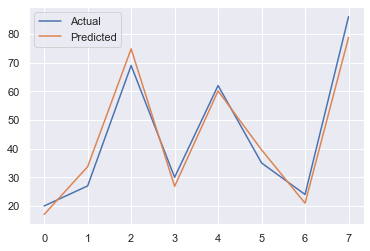

In [79]:
compare.plot()

# Evaluating the data

In [67]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027652


In [74]:
hours = 10
prediction = lr.predict([[hours]])
print("Total Hours = {}".format(hours))
print("Score Predicted = {}".format(prediction[0]))

Total Hours = 10
Score Predicted = 100.25648224983235
